<a href="https://colab.research.google.com/github/KSohi-max/Sherlock_Holmes_NLP/blob/main/Final_Term_Project_3666_03_ANLP_EDA_w_Sherlock_Holmes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SCS-3666-03 SCS_3666_008 Applied Natural Language Processing

### Final Term Project:  ChatBot using Sherlock Holmes Corpus

Date: December 13, 2021

Group Members:
- Kiranpal Sohi
- Lawrence Man

Project layout:

*   Data Set
*   Data Exploration
*   Data Exploration Discussion
*   ChatBot
*   Lessons


# Data Set

In [ ]:
!pip install nltk==3.5

In [ ]:
import nltk
nltk.download('all')

/usr/local/lib/python3.7/dist-packages/scipy/io/matlab/mio5.py:98: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from .mio5_utils import VarReader5
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to /root/nltk_data...
[

True

In [ ]:
!pip install inscriptis

import urllib.request
from inscriptis import get_text

url = "https://sherlock-holm.es/stories/html/cnus.html"
html = urllib.request.urlopen(url).read().decode('utf-8')
 
text = get_text(html)

     |████████████████████████████████| 40 kB 4.6 MB/s 


In [ ]:
print (text[:100000])

  The Complete Sherlock Holmes

  Arthur Conan Doyle

    A Study In Scarlet                         
    Part I                                     
                                             I.  Mr. Sherlock Holmes                                     
                                            II.  The Science Of Deduction                                
                                           III.  The Lauriston Garden Mystery                            
                                            IV.  What John Rance Had To Tell                             
                                             V.  Our Advertisement Brings A Visitor                      
                                            VI.  Tobias Gregson Shows What He Can Do                     
                                           VII.  Light In The Darkness                                   
    Part II                                    
                                          VIII.  On The Grea

# Data Description

Data Set was downloaded from "The Complete Sherlock Holmes by
Arthur Conan Doyle" at URL:  https://sherlock-holm.es/stories/html/cnus.html. Data Set consists of text from sixty (60) books.  For data processing purposes, the volume of text within sixty book is very large and so the completed below will vary on the number of books used.  For example, the Social Network Graph under Exploratory Data Analytics will use only thirty (30) books.  Colab notebook seems to crash if all sixty books are used for the analysis.

# Data Exploration
Exploratory Data Analytics (EDA) includes the following text analysis to extract interesting insights from the text of "The Complete Sherlock Holmes by Arthur Conan Doyale":

*   Calcluate simple statistics
*   Word Cloud
*   Construct Social Network among entities in the books
*   Topic Model to demonstrate topics in the text

### Calculate Simple Statistics

In [ ]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import requests
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

from nltk import wordpunct_tokenize, sent_tokenize, pos_tag
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
url = "https://sherlock-holm.es/stories/html/cnus.html"
html = urlopen(url).read()

# Make a GET request to fetch the raw HTML content
html_content = requests.get(url).text

# Parse the html content
soup = BeautifulSoup(html_content, "lxml")

total_sents = 0
total_tokens = 0
total_stops = 0

for paragraph in soup.find_all("p"):
  for sentence in sent_tokenize(paragraph.text):

    sentence = sent_tokenize(paragraph.text)
    len_sentence = len(sent_tokenize(paragraph.text))
    total_sents = len_sentence + total_sents

    len_token = len(wordpunct_tokenize(paragraph.text))
    total_tokens = len_token + total_tokens

    tokens = wordpunct_tokenize(paragraph.text)
    stopwords_x = [w for w in tokens if w in stopwords.words('english')]
    total_stops = len(stopwords_x) + total_stops

print (' ')
print ('SIMPLE STATISTICS: Based on Web scrapping with Beautuful Soup using lxml')

print (' ')
# 1 Print the number of meaningful words or tokens your program processed
print ('Total no. of Sentences:', total_sents)
print (' ')
# 2 Print the number of sentences your program processed
print ('Total no. of Words:', total_tokens)
print (' ')
# 3 Print the number of Stop words your program encountered
print ('Total no. of Stop Words:', total_stops)
print (' ')

# 4 Print the first 5 sentences with parts of speech tagged for every words in it.

print ('First 5 sentences with parts of speech tagged for every word')
print (' ')
for paragraph in soup.find_all("p", limit=5):
  for sentence in sent_tokenize(paragraph.text):
    print (sentence)
    token = wordpunct_tokenize(paragraph.text)
    tag = pos_tag(token)
    print (tag)
    print (' ')

 
SIMPLE STATISTICS: Based on Web scrapping with Beautuful Soup using lxml
 
Total no. of Sentences: 195380
 
Total no. of Words: 3943230
 
Total no. of Stop Words: 1606256
 
First 5 sentences with parts of speech tagged for every word
 

(Being a reprint from the reminiscences of

John H. Watson, M.D.,

late of the Army Medical Department.)
[('(', '('), ('Being', 'VBG'), ('a', 'DT'), ('reprint', 'NN'), ('from', 'IN'), ('the', 'DT'), ('reminiscences', 'NNS'), ('of', 'IN'), ('John', 'NNP'), ('H', 'NNP'), ('.', '.'), ('Watson', 'NNP'), (',', ','), ('M', 'NNP'), ('.', '.'), ('D', 'NNP'), ('.,', 'NNP'), ('late', 'RB'), ('of', 'IN'), ('the', 'DT'), ('Army', 'NNP'), ('Medical', 'NNP'), ('Department', 'NNP'), ('.)', 'NN')]
 

In the year 1878 I took my degree of Doctor of Medicine of the University of London, and proceeded to Netley to go through the course prescribed for surgeons in the army.
[('In', 'IN'), ('the', 'DT'), ('year', 'NN'), ('1878', 'CD'), ('I', 'PRP'), ('took', 'VBD'), ('my', 

## Word Cloud

In [ ]:
# download data
import os
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
!cp -r '/content/drive/My Drive/Sherlock_Holmes_corpus' '/content'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import glob
from wordcloud import WordCloud,STOPWORDS
from PIL import Image

In [ ]:
def masked_wordcloud(text, mask):
    wordcloud = WordCloud(background_color='white',
                        stopwords = STOPWORDS,
                        max_words = 15000,
                        max_font_size = 86, 
                        random_state = 42,
                        mask = mask)
    wordcloud.generate(text)
    figure_size=(24.0,16.0)
    plt.figure(figsize=figure_size)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

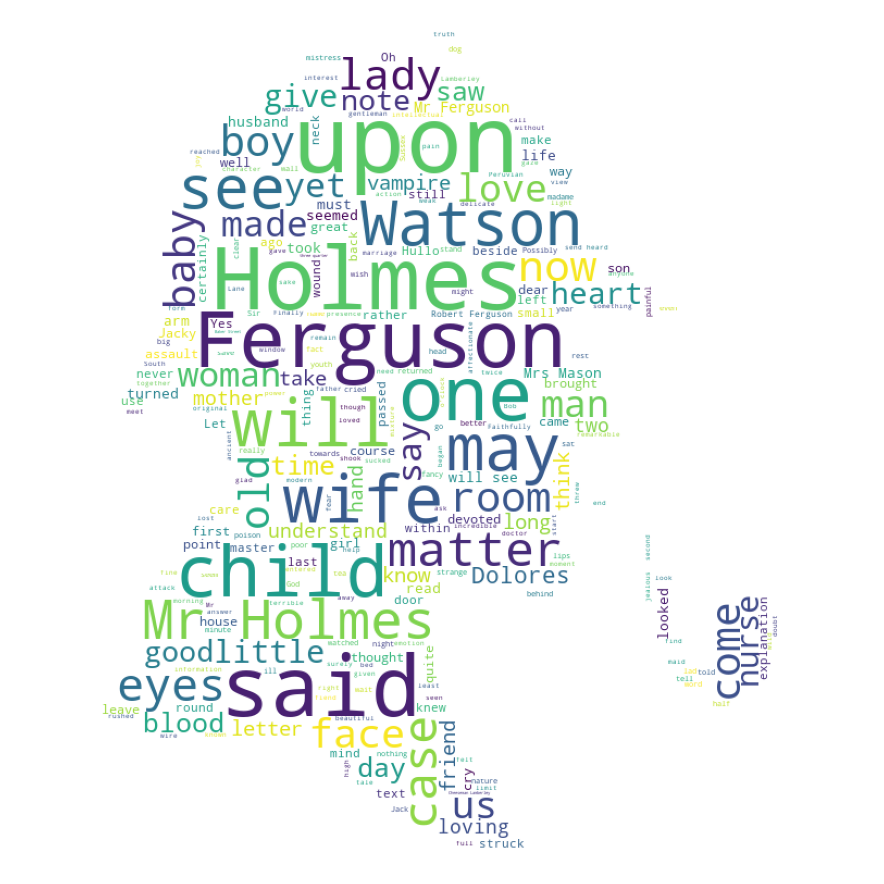

In [ ]:
text=open("/content/Sherlock_Holmes_corpus/The_Sussex_Vampire.txt").read()
mask = np.array(Image.open('/content/drive/My Drive/sherlock-holmes-head.jpeg'))
masked_wordcloud(text, mask)

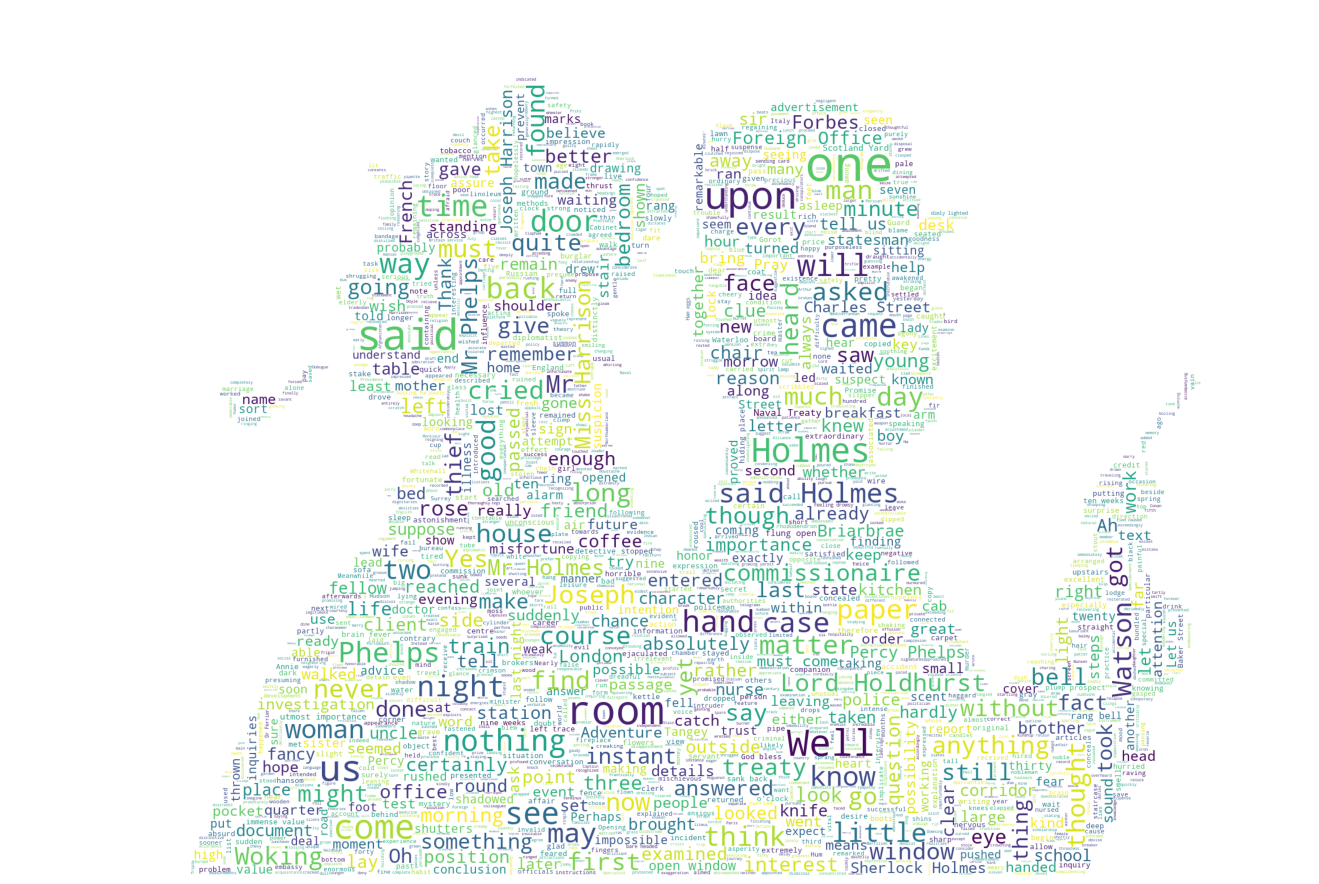

In [ ]:
text=open("/content/Sherlock_Holmes_corpus/The_Naval_Treaty.txt").read()
mask = np.array(Image.open('/content/drive/My Drive/sherlock-holmes-and-watson.jpeg'))
masked_wordcloud(text, mask)

## Social Network Graph

There are total of 60 books in the link.  Running a Social Network Graph for 60 books crashes the Colab notebook.  So it was decided to run only first 10 Books in the Sherlock Holmes corpus to create a Social Network Graph. A Social Network Graph was run using 30 Books as well but it created a very noisy Social Network Graph without much change to the results.

In [ ]:
import glob
import os

file_list = glob.glob(os.path.join(os.getcwd(), "/content/drive/My Drive/Sherlock_Holmes_corpus", "*.txt"))

docs = []

for file_path in file_list[:10]:
    with open(file_path) as f_input:
        docs.append(f_input.read())

print(*docs, sep='\n')





                               A STUDY IN SCARLET

                               Arthur Conan Doyle







                                Table of contents

         Part I
        Mr. Sherlock Holmes
        The Science Of Deduction
        The Lauriston Garden Mystery
        What John Rance Had To Tell
        Our Advertisement Brings A Visitor
        Tobias Gregson Shows What He Can Do
        Light In The Darkness

         Part II
        On The Great Alkali Plain
        The Flower Of Utah
        John Ferrier Talks With The Prophet
        A Flight For Life
        The Avenging Angels
        A Continuation Of The Reminiscences Of John Watson, M.D.
        The Conclusion



















                                      PART I

                   (Being a reprint from the reminiscences of
                              John H. Watson, M.D.,
                      late of the Army Medical Department.)





          CHAPTER I
          Mr. Sherlock Holmes


     In t

In [ ]:
import pickle
with open("books.txt", "wb") as fp:   # Pickling
    pickle.dump(docs, fp)

In [ ]:
with open('books.txt', 'rb') as fp:   # Unpickling
    corpus = pickle.load(fp)

In [ ]:
# for natural language processing
import spacy
import en_core_web_sm
nlp = en_core_web_sm.load()

entities = []
for shbook in corpus:
    tokens = nlp(''.join(shbook))
    person_list = []
    for ent in tokens.ents:
        if ent.label_ == 'PERSON':
            person_list.append(ent.text)
    entities.append(person_list)

In [ ]:
print (*entities, sep = '\n')

['Sherlock Holmes', 'John Rance', 'Tobias Gregson', 'John Ferrier Talks', 'John Watson', 'John H. Watson', 'Sherlock Holmes\n\n\n     ', 'Netley', 'Candahar', 'Orontes', 'Portsmouth', 'Watson', 'Young Stamford', 'Sherlock Holmes', 'I.\n\n     ', 'Holmes', 'Bunsen', 'Watson', 'Sherlock Holmes', 'Von Bischoff', 'Muller', 'Samson', 'Holmes', 'Holmes', 'Holmes', 'Thomas Carlyle', 'Lestrade', 'seedy visitor', 'Sherlock Holmes', 'Edgar Allen', 'Dupin', 'Holmes', 'Dupin', 'Dupin', 'Gaboriau', 'Lecoq', 'Holmes', 'Sherlock Holmes', 'Sherlock Holmes', 'Holmes', 'Sherlock Holmes', 'Lauriston\n     Gardens', 'Gregson', 'Cremona', 'Holmes', 'Lauriston Gardens', 'Gregson', 'Lestrade', 'Gregson', 'Sherlock Holmes', 'Gregson', 'Gregson', 'Holmes', 'Van Jansen', 'Gregson', 'Gregson', 'Gregson', 'Holmes', 'Gregson', 'Albert', 'the E. J. D.', 'Joseph Stangerson', 'E. J. Drebber', 'Joseph Stangerson', 'Stangerson', 'Gregson', 'Stangerson', 'Gregson', 'Holmes', 'Gregson', 'Gregson', 'Rachel', 'Rachel', 'Sh

In [ ]:
shbooks = []
for entity_list in entities:
    cleaned_entity_list = []
    for entity in entity_list:
        cleaned_entity_list.append(entity.lstrip('the ').replace("'s", "").replace("’s","").replace("\n", "").replace("\n\n", "").replace('\n\n\n\n     ', ""))
    shbooks.append(cleaned_entity_list)

In [ ]:
print (*shbooks, sep = '\n')

['Sherlock Holmes', 'John Rance', 'Tobias Gregson', 'John Ferrier Talks', 'John Watson', 'John H. Watson', 'Sherlock Holmes     ', 'Netley', 'Candahar', 'Orontes', 'Portsmouth', 'Watson', 'Young Stamford', 'Sherlock Holmes', 'I.     ', 'Holmes', 'Bunsen', 'Watson', 'Sherlock Holmes', 'Von Bischoff', 'Muller', 'Samson', 'Holmes', 'Holmes', 'Holmes', 'Thomas Carlyle', 'Lestrade', 'seedy visitor', 'Sherlock Holmes', 'Edgar Allen', 'Dupin', 'Holmes', 'Dupin', 'Dupin', 'Gaboriau', 'Lecoq', 'Holmes', 'Sherlock Holmes', 'Sherlock Holmes', 'Holmes', 'Sherlock Holmes', 'Lauriston     Gardens', 'Gregson', 'Cremona', 'Holmes', 'Lauriston Gardens', 'Gregson', 'Lestrade', 'Gregson', 'Sherlock Holmes', 'Gregson', 'Gregson', 'Holmes', 'Van Jansen', 'Gregson', 'Gregson', 'Gregson', 'Holmes', 'Gregson', 'Albert', 'E. J. D.', 'Joseph Stangerson', 'E. J. Drebber', 'Joseph Stangerson', 'Stangerson', 'Gregson', 'Stangerson', 'Gregson', 'Holmes', 'Gregson', 'Gregson', 'Rachel', 'Rachel', 'Sherlock Holmes', 

In [ ]:
shbooks = [shbook for shbook in shbooks if shbook != []]
print (*shbooks, sep = '\n')

['Sherlock Holmes', 'John Rance', 'Tobias Gregson', 'John Ferrier Talks', 'John Watson', 'John H. Watson', 'Sherlock Holmes     ', 'Netley', 'Candahar', 'Orontes', 'Portsmouth', 'Watson', 'Young Stamford', 'Sherlock Holmes', 'I.     ', 'Holmes', 'Bunsen', 'Watson', 'Sherlock Holmes', 'Von Bischoff', 'Muller', 'Samson', 'Holmes', 'Holmes', 'Holmes', 'Thomas Carlyle', 'Lestrade', 'seedy visitor', 'Sherlock Holmes', 'Edgar Allen', 'Dupin', 'Holmes', 'Dupin', 'Dupin', 'Gaboriau', 'Lecoq', 'Holmes', 'Sherlock Holmes', 'Sherlock Holmes', 'Holmes', 'Sherlock Holmes', 'Lauriston     Gardens', 'Gregson', 'Cremona', 'Holmes', 'Lauriston Gardens', 'Gregson', 'Lestrade', 'Gregson', 'Sherlock Holmes', 'Gregson', 'Gregson', 'Holmes', 'Van Jansen', 'Gregson', 'Gregson', 'Gregson', 'Holmes', 'Gregson', 'Albert', 'E. J. D.', 'Joseph Stangerson', 'E. J. Drebber', 'Joseph Stangerson', 'Stangerson', 'Gregson', 'Stangerson', 'Gregson', 'Holmes', 'Gregson', 'Gregson', 'Rachel', 'Rachel', 'Sherlock Holmes', 

In [ ]:
# for visualizations
%matplotlib inline
from matplotlib.pyplot import figure
import networkx as nx

G = nx.Graph()

for entities in shbooks:
    G.add_nodes_from(entities)

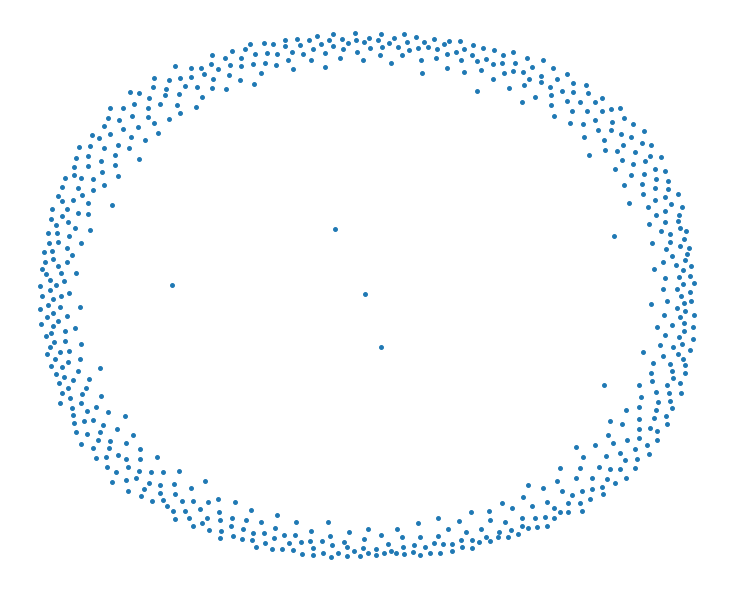

In [ ]:
figure(figsize=(10, 8))
nx.draw(G, node_size=15)

In [ ]:
for entities in shbooks:
    if len(entities) > 1:
        for i in range(len(entities)-1):
           G.add_edges_from([(str(entities[i]),str(entities[i+1]))])

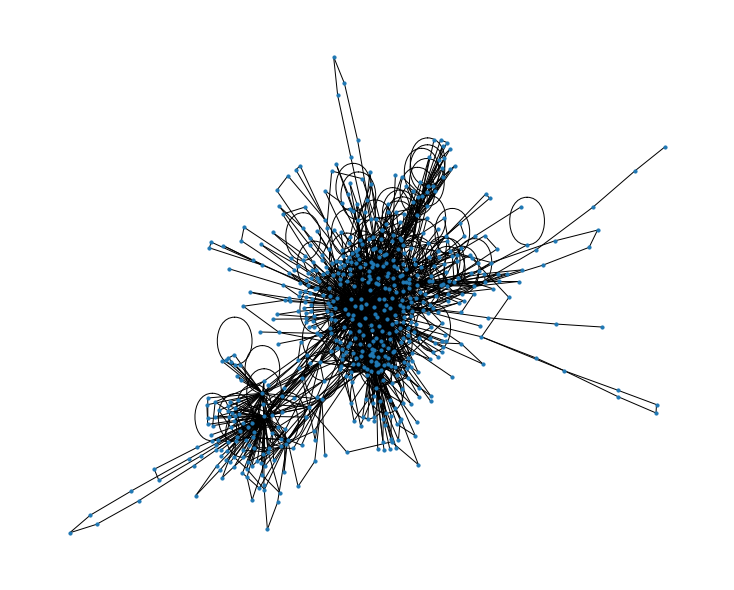

In [ ]:
figure(figsize=(10, 8))
nx.draw(G, node_size=10)

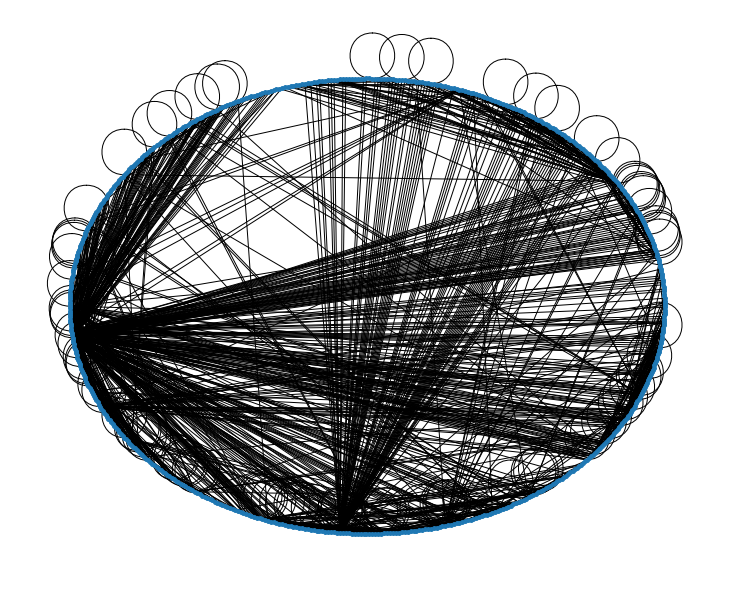

In [ ]:
figure(figsize=(10, 8))
nx.draw_shell(G, node_size=15)

In [ ]:
from operator import itemgetter
degree_dict = dict(G.degree(G.nodes()))
nx.set_node_attributes(G, degree_dict, 'degree')
sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)

In [ ]:
print("Top 10 nodes by degree:")
for d in sorted_degree[:10]:
    print(d)

Top 10 nodes by degree:
('Holmes', 225)
('Watson', 112)
('Sherlock Holmes', 89)
('McMurdo', 83)
('McGinty', 44)
('Morstan', 38)
('Stapleton', 33)
('I.     ', 32)
('Charles', 32)
('Mortimer', 31)


In [ ]:
import heapq
from operator import itemgetter
from tabulate import tabulate

def nbest_centrality(G, metrics, n=10):
    # Compute the centrality scores for each vertex
    nbest = {}
    for name, metric in metrics.items():
        scores = metric(G)
        # Set the score as a property on each node
        nx.set_node_attributes(G, name=name, values=scores)
        # Find the top n scores and print them along with their index
        topn = heapq.nlargest(n, scores.items(), key=itemgetter(1))
        nbest[name] = topn
    return nbest    

### Building Degree Centrality
centralities = {"Degree Centrality" : nx.degree_centrality}
centrality = nbest_centrality(G, centralities, 10)

for measure, scores in centrality.items():
    print("Rankings for {}:".format(measure))
    print((tabulate(scores, headers=["Top Terms", "Score"])))
    print("")

Rankings for Degree Centrality:
Top Terms            Score
---------------  ---------
Holmes           0.356013
Watson           0.177215
Sherlock Holmes  0.140823
McMurdo          0.131329
McGinty          0.0696203
Morstan          0.0601266
Stapleton        0.0522152
I.               0.0506329
Charles          0.0506329
Mortimer         0.0490506



## Topic Model

In [ ]:
import glob
import os
import pandas as pd

file_list = glob.glob(os.path.join(os.getcwd(), "/content/drive/My Drive/Sherlock_Holmes_corpus", "*.txt"))

lda_shbooks = []
files = []

for file_path in file_list:
    with open(file_path, encoding="latin-1") as f_input:
        lda_shbooks.append(f_input.read())
        files.append(''.join([n for n in os.path.basename(file_path)]))

df = pd.DataFrame({'Name':files, 'Story':lda_shbooks})
df['Name'] = df['Name'].str[:-4]
df['Story']= df['Story'].replace(r'\r+|\n+|\t+','', regex=True)
print (df)

                                     Name                                              Story
0                      A_Study_In_Scarlet                                 A STUDY IN SCAR...
1                    The_Sign_of_the_Four                                THE SIGN OF THE ...
2           The_Hound_of_the_Baskervilles                            THE HOUND OF THE BAS...
3                      The_Valley_of_Fear                                 THE VALLEY OF F...
4                    A_Scandal_in_Bohemia                                A SCANDAL IN BOH...
5                   The_Red-Headed_League                                THE RED-HEADED L...
6                      A_Case_of_Identity                                 A CASE OF IDENT...
7             The_Boscombe_Valley_Mystery                             THE BOSCOMBE VALLEY...
8                    The_Five_Orange_Pips                                THE FIVE ORANGE ...
9            The_Man_with_the_Twisted_Lip                            T

In [ ]:
print(df.iloc[0]['Story'])

                               A STUDY IN SCARLET                               Arthur Conan Doyle                                Table of contents         Part I        Mr. Sherlock Holmes        The Science Of Deduction        The Lauriston Garden Mystery        What John Rance Had To Tell        Our Advertisement Brings A Visitor        Tobias Gregson Shows What He Can Do        Light In The Darkness         Part II        On The Great Alkali Plain        The Flower Of Utah        John Ferrier Talks With The Prophet        A Flight For Life        The Avenging Angels        A Continuation Of The Reminiscences Of John Watson, M.D.        The Conclusion                                      PART I                   (Being a reprint from the reminiscences of                              John H. Watson, M.D.,                      late of the Army Medical Department.)          CHAPTER I          Mr. Sherlock Holmes     In the year 1878 I took my degree of Doctor of Medicine of the     Uni

In [ ]:
# Function for text cleaning: remove punctuation, whitespace and convert to lowercase
import re
def clean_text(text):
   
    # Remove backslash-apostrophe 
    text = re.sub("\'", "", text) 
   
    # Remove everything except alphabets 
    text = re.sub("[^a-zA-Z]"," ",text) 
   
    # Remove whitespaces 
    text = ' '.join(text.split()) 
   
    # Convert text to lowercase 
    text = text.lower() 
    
    return text

In [ ]:
# Clean plot summaries
df['Story'] = df['Story'].apply(lambda x: clean_text(x))


In [ ]:
# Function to remove stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)

df['Story'] = df['Story'].apply(lambda x: remove_stopwords(x))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df

Name                                              Story
0                      A_Study_In_Scarlet  study scarlet arthur conan doyle table content...
1                    The_Sign_of_the_Four  sign four arthur conan doyle table contents sc...
2           The_Hound_of_the_Baskervilles  hound baskervilles arthur conan doyle table co...
3                      The_Valley_of_Fear  valley fear arthur conan doyle table contents ...
4                    A_Scandal_in_Bohemia  scandal bohemia arthur conan doyle table conte...
5                   The_Red-Headed_League  red headed league arthur conan doyle called up...
6                      A_Case_of_Identity  case identity arthur conan doyle dear fellow s...
7             The_Boscombe_Valley_Mystery  boscombe valley mystery arthur conan doyle sea...
8                    The_Five_Orange_Pips  five orange pips arthur conan doyle glance not...
9            The_Man_with_the_Twisted_Lip  man twisted lip arthur conan doyle isa whitney...
10    The_Adventure_of_the_Blue_Carbuncle  adventure blue carbuncle arthur conan doyle ca...
11     The_Adventure_of_the_Speckled_Band  adventure speckled band arthur conan doyle gla...
12  The_Adventure_of_the_Engineer_s_Thumb  adventure engineers thumb arthur conan doyle p...
13    The_Adventure_of_the_Noble_Bachelor  adventure noble bachelor arthur conan doyle lo...
14     The_Adventure_of_the_Beryl_Coronet  adventure beryl coronet arthur conan doyle hol...
15    The_Adventure_of_the_Copper_Beeches  adventure copper beeches arthur conan doyle ma...
16                            Yellow_Face  yellow face arthur conan doyle publishing shor...
17                The_Stockbroker_s_Clerk  stock brokers clerk arthur conan doyle shortly...
18                       The_Gloria_Scott  gloria scott arthur conan doyle papers said fr...
19                           Silver_Blaze  silver blaze arthur conan doyle afraid watson ...
20                    The_Musgrave_Ritual  musgrave ritual arthur conan doyle anomaly oft...
21                     The_Reigate_Puzzle  reigate squires arthur conan doyle time health...
22                        The_Crooked_Man  crooked man arthur conan doyle one summer nigh...
23                   The_Resident_Patient  resident patient arthur conan doyle glancing s...
24                  The_Greek_Interpreter  greek interpreter arthur conan doyle long inti...
25                       The_Naval_Treaty  naval treaty arthur conan doyle july immediate...
26                      The_Final_Problem  final problem arthur conan doyle heavy heart t...
27                        The_Empty_House  adventure empty house arthur conan doyle sprin...
28                    The_Norwood_Builder  adventure norwood builder arthur conan doyle p...
29                        The_Dancing_Men  adventure dancing men arthur conan doyle holme...
30                   The_Solitary_Cyclist  adventure solitary cyclist arthur conan doyle ...
31                      The_Priory_School  adventure priory school arthur conan doyle dra...
32                            Black_Peter  adventure black peter arthur conan doyle never...
33             Charles_Augustus_Milverton  adventure charles augustus milverton arthur co...
34                      The_Six_Napoleons  adventure six napoleons arthur conan doyle unu...
35                     The_Three_Students  adventure three students arthur conan doyle ye...
36                   The_Golden_Pince-Nez  adventure golden pince nez arthur conan doyle ...
37              The_Missing_Three-Quarter  adventure missing three quarter arthur conan d...
38                       The_Abbey_Grange  adventure abbey grange arthur conan doyle bitt...
39                       The_Second_Stain  adventure second stain arthur conan doyle inte...
40                         Wisteria_Lodge  adventure wisteria lodge arthur conan doyle ta...
41                      The_Cardboard_Box  adventure cardboard box arthur conan doyle cho...
42                         The_Red_Cir

In [ ]:
# Extract features
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=500)

xtrain = df['Story']

# Create TF-IDF features
xtrain_tfidf = tfidf_vectorizer.fit_transform(xtrain)

In [ ]:
import numpy as np
import pandas as pd

from sklearn.decomposition import LatentDirichletAllocation

# Create objective for LDA and define components
lda_model = LatentDirichletAllocation(n_components=2 , max_iter=20, random_state=20)

# Fit transform on model on our count ventorizer : running this will return our topics
X_topics = lda_model.fit_transform(xtrain_tfidf)

# .components_ gives us our topic distribution
topic_words = lda_model.components_

In [ ]:
# Convert TF-IDF vectors into vocabulary
vocab_tfidf = tfidf_vectorizer.get_feature_names()
vocab_tfidf

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['absolutely',
 'account',
 'act',
 'action',
 'address',
 'adventure',
 'advice',
 'affair',
 'afraid',
 'afternoon',
 'afterwards',
 'age',
 'ago',
 'almost',
 'along',
 'amazement',
 'american',
 'answer',
 'anyone',
 'appear',
 'appearance',
 'appears',
 'arm',
 'arms',
 'arrived',
 'assure',
 'attention',
 'aware',
 'bad',
 'baker',
 'barker',
 'barrymore',
 'baskerville',
 'beautiful',
 'became',
 'become',
 'bed',
 'bedroom',
 'began',
 'bell',
 'beyond',
 'big',
 'bit',
 'blood',
 'blow',
 'blue',
 'body',
 'book',
 'boots',
 'box',
 'boy',
 'brain',
 'break',
 'breakfast',
 'bring',
 'broad',
 'broke',
 'broken',
 'brother',
 'brown',
 'butler',
 'cab',
 'cant',
 'card',
 'care',
 'carefully',
 'carriage',
 'carry',
 'cause',
 'caused',
 'centre',
 'certain',
 'change',
 'chapter',
 'character',
 'charles',
 'child',
 'city',
 'clearly',
 'client',
 'closed',
 'clue',
 'coat',
 'cold',
 'colonel',
 'common',
 'company',
 'complete',
 'confess',
 'confidence',
 'considerable',


In [ ]:
# Get the Topics

# Define number of Words that we want to print on every topic
n_top_words = 5

# np.argsort to sorting an array or alist or the matrix acc to their values
for i, topic_dist in enumerate(topic_words):
  
  #To view actual words present in those indexes make use of vocab
  sorted_topic_dist = np.argsort(topic_dist)
  
  # using sorted_topic_indexes we extract the words from vocab
  # getting topics + words
  # topic_words varible contains Topic and respective words present in topics
  topic_words = np.array(vocab_tfidf)[sorted_topic_dist]
  print ('Topic', str(i+1), topic_words)

Topic 1 ['barrymore' 'stapleton' 'mcginty' 'baskerville' 'hound' 'barker'
 'chapter' 'mcmurdo' 'id' 'douglas' 'duty' 'stranger' 'signs' 'carry'
 'conversation' 'guess' 'stared' 'iron' 'charles' 'prove' 'finger'
 'somewhat' 'smiled' 'didnt' 'trace' 'appears' 'running' 'gate' 'treasure'
 'inquiry' 'minute' 'distance' 'soul' 'suggest' 'twice' 'report'
 'sometimes' 'mere' 'evident' 'seated' 'brain' 'official' 'afternoon'
 'number' 'throw' 'sorry' 'spent' 'couple' 'houses' 'pointed' 'marks'
 'unless' 'wooden' 'journey' 'thick' 'easily' 'moved' 'carefully' 'jack'
 'wild' 'confidence' 'arms' 'faced' 'act' 'observe' 'marked' 'age'
 'convinced' 'caused' 'matters' 'write' 'thousand' 'nine' 'dropped'
 'service' 'boots' 'darkness' 'appear' 'questions' 'promise' 'lived'
 'huge' 'explained' 'wished' 'opinion' 'confess' 'remained' 'lying'
 'engaged' 'energy' 'feeling' 'middle' 'change' 'cause' 'continued' 'lie'
 'lit' 'theory' 'bit' 'common' 'force' 'mouth' 'watch' 'afraid' 'notice'
 'self' 'laughed'

In [ ]:
!pip install pyLDAvis

In [ ]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

pyLDAvis.sklearn.prepare(lda_model, xtrain_tfidf, tfidf_vectorizer)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
0      0.003712  0.0       1        1  95.375776
1     -0.003712  0.0       2        1   4.624224, topic_info=          Term      Freq     Total Category  logprob  loglift
207      horse  1.000000  1.000000  Default  30.0000  30.0000
143   evidence  1.000000  1.000000  Default  29.0000  29.0000
62        cant  1.000000  1.000000  Default  28.0000  28.0000
43       blood  1.000000  1.000000  Default  27.0000  27.0000
26   attention  1.000000  1.000000  Default  26.0000  26.0000
..         ...       ...       ...      ...      ...      ...
262       maid  0.063432  1.765866   Topic2  -6.2138  -0.2526
421      stone  0.063430  1.909564   Topic2  -6.2138  -0.3308
420      stick  0.063429  1.156377   Topic2  -6.2138   0.1707
436      thats  0.063429  1.963274   Topic2  -6.2138  -0.3586
218         im  0.063428  1.381062   Topic2  -6.2138  -0.0068

[115 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
1         1  1.167560    account
12        1  1.271299        ago
16        1  1.098045   american
21        1  0.960046    appears
26        1  1.226936  attention
...     ...       ...        ...
436       1  1.018706      thats
450       1  0.960175      trace
460       1  1.231160       turn
482       1  1.080741       wife
486       1  1.051661      woman

[102 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2])

# Data Exploration Discussion

**Simple Statistics**

Simple statistics provided information on the number of sentences and words used in all sixty (60) stories. Almost half the corpus is made of Stop Words as defined by NLTK Corpus module.  

**Word Cloud with Silhouette Mask**

*The Sussex Vampire*. and *The Naval Treaty* stories respectively used for Word Cloud exploration.

Interestingly, neither story titles were relevant to the prevalent words in the stories.  For example, I anticipated a few more naval terms to be in the *The Naval Treaty* story but in fact there were very few that bubbled to the top in the Word Cloud.

There were however some interesting observations

*   Common Words:  The words "upon", "one" and "will" are common and very prevalent in both stories.  As it is a novel, the word "said" is prevalent as well.
*   "Ferguson" seems to be a significant figure in *The Sussex Vampire* even compared to *Dr. Watson* surprisingly. The same is true for the word "child" in the book.
*   "us", "room" and "well" are prevalent in *The Naval Treaty*
*   Interestingly, *The Naval Treaty* word cloud considered the words "said Holmes" as a single word while also identify them as separate prevalent words, namely "said" and "Holmes".

**Social Network Graph**

Social Network Graph was created using first ten (10) books and SpaCy NER extraction using "PERSON" entity from the corpus. As expected, Holmes and Watson have the highest ranking for Degree Centrality.

A Social Network Graph using all sixy (60) books was run but the notebook crashed.  So a smaller number of thirty (30) or half the corpus was used.  But this created a very messy Social Network Graph which seemed very busy visually. So it was decided that only ten (10) books would be used in the final run which would allow for a relatively reasonable visualization of Social Network Graphy.  Note that this is still a "busy" graph but is reasonably understandable.

The "Top 10 nodes by Degree" or "Top 10 Rankings for Degree Centrality" were run.  Interestingly, there was very little difference in the top 10 Degree Centrality even when different combinations of books were run through the algorithm. 

The one thing to note is that, the SpaCy extraction using "PERSON" was unable to recognize the commonality between "Holmes" and "Sherlock Holmes".  Also it identified "I." as an "PERSON" entity. To further clean this up, the entity should be removed for cleaner analysis.

**Topic Modeling**

A number of different combination were run for Topic Model using Number of Stories and Number of Topics. The number of stories tried included 10, 15, 30, 40 and Number of Topics tried included 3, 4, 5, 6. 

The best option seems to be:

*   Use all sixty (60) storie
*   Use only two (2) topics

For almost all combinations, one topic consisting of terms “woman”, “lady” and “miss” were highly prevalent in the Sherlock Holmes corpus. 

As LatentDirichletAllocation changes at every new runtime, it was difficult to compare the various different combinations.  For number of Topics tried, a number greater than 2 created a duplicate of same topic that mapped on top of each other. So it seems that there were very few types of topics within the Sherlock Holmes books.  Or it requires further fine-tuning to identify just the right combination.

# Lessons for Data Exploration

**Simple Statistics**: A frequency distribution of words would have added to the understanding of the corpus

**Word Cloud**:  A cloud with all sixty (60) books may have provided some common usage of words for the corpus

**Social Network Graph**:  Cleaning of entities would have helped clean up the results

**Topic Modeling**:  More fine-tuning may improve the variability of topics within the corpus


# ChatBot

ChatBot was completed in other Colab Notebooks for efficiency reasons.

1) ["/content/drive/MyDrive/3666 - Applied Natural Language Processing/Term Project"](https://drive.google.com/drive/folders/1MdXu4U7PteNh4jv39c5dEZPN6UTIDE8f?usp=sharing) (Google Drive directory for Chatbot)

2) [pickle_Sherlock_Holmes_corpus.ipynb](https://drive.google.com/file/d/1tmFjqtSwaT-TCh2Xp3cBeqkHk9-a8CNY/view?usp=sharing) (to pickle text corpus)

3) [Sherlock_Holmes_trivia_detective.ipynb](https://drive.google.com/file/d/16bv2cLXYiY66bBZw_02_bloNjlwogZNr/view?usp=sharing
) (Chatbot for term project, derived from Module 8)


4) [Sherlock_Holmes_trivia_detective_transfer_learning.ipynb](https://colab.research.google.com/drive/1UIpRKLaJAxSWBKDXpjZV0fUJpSTzU5EQ?usp=sharing) (Chatbot based on Transfer Learning, derived from Module 11)




## Discussion and Lesson

For discussion and lesson related to the chatbot, refer to the corresponding sections of the [Sherlock_Holmes_trivia_detective.ipynb](https://colab.research.google.com/drive/16bv2cLXYiY66bBZw_02_bloNjlwogZNr) notebook.